### 2nd CNN Model Demo
#### Using a frog image from the internet

#### Loading the model

In [1]:
import tensorflow as tf

model2 = tf.keras.models.Sequential([
    # First Conv Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Second Conv Block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Third Conv Block
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Fourth Conv Block
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='softmax')
])

In [2]:
model2.load_weights('best_cnn_model.h5')

#### Visualize the image

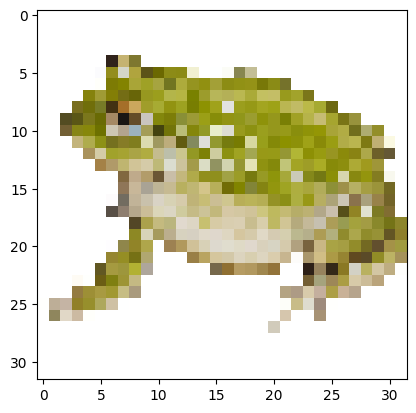

In [25]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Open an image
frog_image = Image.open("frog-from-internet-1.jpg")
frog_image = frog_image.resize((32,32), Image.Resampling.NEAREST) # resize

frog_array = np.array(frog_image)
frog_array = frog_array.astype('float64') / 255.0 # normalize
plt.imshow(frog_array)
plt.show()

### Predict the frog

In [26]:
prediction = model2.predict(np.array([frog_array]))
class_index = np.argmax(prediction)

1/1 [==============================] - 0s 16ms/step


In [27]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_names[class_index]

'frog'